In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from tensorflow.keras import initializers
import numpy as np
import os
import random
import pickle
from shutil import copyfile
from zipfile import ZipFile

# Dataset

In [ ]:
from google.colab import files

files.upload()

KeyboardInterrupt: ignored

In [ ]:
!mkdir kaggle

mkdir: cannot create directory ‘kaggle’: File exists


In [ ]:
!mv kaggle.json /content/kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/kaggle"

In [ ]:
!chmod 600. /content/kaggle/kaggle.json

chmod: invalid mode: ‘600.’
Try 'chmod --help' for more information.


In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets download -d kutaykutlu/forest-fire

forest-fire.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
FILE_DIR = '/content/forest-fire.zip'
DATASET_DIR = '/content/Dataset'
TRAIN_DIR = r'/content/Dataset/Train'
VAL_DIR =  r'/content/Dataset/Val'

NON_FIRE = r'/content/Dataset/test_big'
FIRE_DIR = r'/content/Dataset/train_fire'


In [ ]:
SPLIT_DATASET = 0.8

In [ ]:
try:
  os.mkdir(DATASET_DIR)
  os.mkdir(TRAIN_DIR)
  os.mkdir(VAL_DIR)
except:
  print('directory exists')

directory exists


In [ ]:
Label = ['fire', 'non_fire']
#create dir classes on train dir

for class_ in Label:
  try:
    data_dir = TRAIN_DIR+'/'+class_
    os.mkdir(data_dir)
  except:
    print('file exists')
  

#create dir classes on train dir
for class_ in Label:
  try:
    data_dir = VAL_DIR+'/'+class_
    os.mkdir(data_dir)
  except:
    print('file exists')

file exists
file exists
file exists
file exists


In [ ]:
with ZipFile(FILE_DIR, 'r') as zip:
    zip.extractall(DATASET_DIR)
    zip.close()

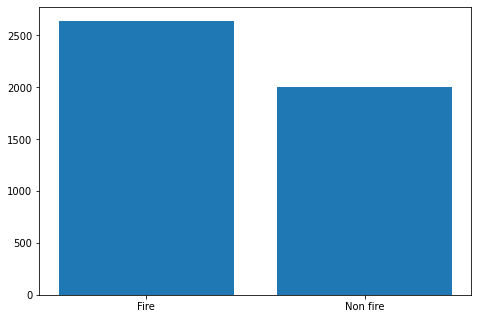

In [ ]:
# Check distribution of datasets
import matplotlib.pyplot as plt

smoke = len(os.listdir(NON_FIRE))
fire = len(os.listdir(FIRE_DIR))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Fire', 'Non fire']
data = [fire, smoke]
ax.bar(label,data)

plt.show()

### Adding New Dataset 

###### New Dataset 2

In [ ]:
## remove existing file
!rm /content/forest-fire.zip

In [ ]:
!kaggle datasets download -d jerrinbright/forest-fire --force

 98% 489M/497M [00:14<00:00, 33.7MB/s]
100% 497M/497M [00:14<00:00, 35.3MB/s]


In [ ]:
os.mkdir('Extension Dataset 2')

FileExistsError: ignored

In [ ]:
EXT_DATASET_DIR_2 = '/content/Extension Dataset 2'
EXT_DATASET_FILE_2 = '/content/forest-fire.zip'

In [ ]:
with ZipFile(EXT_DATASET_FILE_2, 'r') as zip:
    zip.extractall(EXT_DATASET_DIR_2)
    zip.close()

In [ ]:
len(os.listdir('/content/Extension Dataset 2/FIRE_DATASET/fire_images'))

In [ ]:
len(os.listdir('/content/Extension Dataset 2/FIRE_DATASET/non_fire_images'))

In [ ]:
#copy new dataset to the folder dataset
for f in os.listdir('/content/Extension Dataset 2/FIRE_DATASET/fire_images'):
  file_dir = '/content/Extension Dataset 2/FIRE_DATASET/fire_images/'+f
  dest_dir = FIRE_DIR+'/'+f
  copyfile(file_dir, dest_dir)

In [ ]:
non = len(os.listdir(NON_FIRE))
fire = len(os.listdir(FIRE_DIR))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Distribution Dataset')
label = ['Fire', 'Non Fire']
data = [fire,  non]
ax.bar(label,data)

plt.show()

###### New Dataset 1

In [ ]:
# Adding new fire dataset
!kaggle datasets download -d phylake1337/fire-dataset

In [ ]:
os.mkdir('Extension Dataset')

In [ ]:
EXT_DATASET_DIR = '/content/Extension Dataset'
EXT_DATASET_FILE = '/content/fire-dataset.zip'

In [ ]:
with ZipFile(EXT_DATASET_FILE, 'r') as zip:
    zip.extractall(EXT_DATASET_DIR)
    zip.close()

### Spliting Dataset 

In [ ]:
def split_data(source, split_size, train_dir, val_dir):
    dataset = os.listdir(source)
    total_data = len(dataset)
    #mencari size train
    train_size = int(total_data * split_size)
    #merandom dataset
    shuffled = random.sample(dataset, len(dataset))
    #membagi dataset
    train_data = shuffled[0:train_size]
    val_data = shuffled[train_size:]
    

    for file in train_data:
        file_dir = source+'/'+file
        train_destination = train_dir +'/'+ file
        copyfile(file_dir, train_destination)

    for file in val_data:
        file_dir = source+'/'+file
        test_destination = val_dir +'/'+ file
        copyfile(file_dir, test_destination)

In [ ]:
FIRE_TRAIN = '/content/Dataset/Train/fire'
FIRE_VAL = '/content/Dataset/Val/fire'

split_data(FIRE_DIR, SPLIT_DATASET, FIRE_TRAIN, FIRE_VAL)

In [ ]:
NON_TRAIN = '/content/Dataset/Train/non_fire'
NON_VAL = '/content/Dataset/Val/non_fire'

split_data(NON_FIRE, SPLIT_DATASET, NON_TRAIN, NON_VAL)

In [ ]:
## Additional 1
FIRE_TRAIN = '/content/Dataset/Train/fire'
FIRE_VAL = '/content/Dataset/Val/fire'

split_data('/content/Extension Dataset/fire_dataset/fire_images', SPLIT_DATASET, FIRE_TRAIN, FIRE_VAL)

NON_TRAIN = '/content/Dataset/Train/non_fire'
NON_VAL = '/content/Dataset/Val/non_fire'

split_data('/content/Extension Dataset/fire_dataset/non_fire_images', SPLIT_DATASET, NON_TRAIN, NON_VAL)

In [ ]:
## Additional 1
FIRE_TRAIN = '/content/Dataset/Train/fire'
FIRE_VAL = '/content/Dataset/Val/fire'

split_data('/content/Extension Dataset 2/FIRE_DATASET/fire_images', SPLIT_DATASET, FIRE_TRAIN, FIRE_VAL)

NON_TRAIN = '/content/Dataset/Train/non_fire'
NON_VAL = '/content/Dataset/Val/non_fire'

split_data('/content/Extension Dataset 2/FIRE_DATASET/non_fire_images', SPLIT_DATASET, NON_TRAIN, NON_VAL)

In [ ]:
print('Train')
print('Fire : '+str(len(os.listdir(FIRE_TRAIN)))+' images')
print('Non Fire : '+str(len(os.listdir(NON_TRAIN)))+' images')


In [ ]:
print('Val')
print('Fire : '+str(len(os.listdir(FIRE_VAL)))+' images')
print('Non Fire : '+str(len(os.listdir(NON_VAL)))+' images')

# Pre-Processing

In [ ]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

In [ ]:
train_generator  = ImageDataGenerator(horizontal_flip=True,
                                      zoom_range = 0.4,
                                      rotation_range = 30,
                                      shear_range=0.4,
                                      rescale=1/255,
                                      fill_mode = 'nearest')

val_generator  = ImageDataGenerator(rescale=1/255)

In [ ]:
## Visualisasi Image Augmentation
import numpy as np
import matplotlib.pyplot as plt

ex_img = '/content/Dataset/train_fire/1.png'

img = load_img(ex_img)
img_arr = img_to_array(img)
plt.title('Real Image')
plt.imshow(img)
new_img = np.expand_dims(img_arr, 0)
imageDataGen = ImageDataGenerator(horizontal_flip=True,
                                      zoom_range = 0.4,
                                      rotation_range = 30,
                                      shear_range=0.4,
                                      fill_mode = 'nearest')
iterate = imageDataGen.flow(new_img, batch_size=1)

plt.figure(figsize=(10, 8))

for i in range(9):
  plt.subplot(330  + 1 + i)
  batch = iterate.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()


In [ ]:
train_data_generator = train_generator.flow_from_directory(TRAIN_DIR,
                                                           target_size= IMAGE_SIZE,
                                                           batch_size=BATCH_SIZE,
                                                           class_mode ='categorical')


val_data_generator = val_generator.flow_from_directory(VAL_DIR,
                                                      target_size= IMAGE_SIZE,
                                                      batch_size=BATCH_SIZE,
                                                      class_mode ='categorical')

# Utils

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99) and (logs.get('val_accuracy')>0.93) :
            print("\nReached!")
            self.model.stop_training = True

In [ ]:
def lr_scheduler(epochs, lr):
    if epochs > 50 and epochs < 75:
        lr = 0.001
    if epochs > 75:
        lr = 0.0001
    return lr

In [ ]:
callback = myCallback()

In [ ]:
scheduler = LearningRateScheduler(lr_scheduler, verbose=1)

# Transfer Learning

In [ ]:
IMAGE_SHAPE = (224,224,3)

In [ ]:
model = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=IMAGE_SHAPE),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.summary( )

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_generator,
                    validation_data=val_data_generator,
                    steps_per_epoch=20,
                    epochs=20,
                    validation_steps=5)

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.figure(figsize=(16,9))
plt.subplot(221)

plt.grid(True)
plt.plot(epochs, acc, 'g')
plt.plot(epochs, val_acc, 'b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='best')
plt.title('Training and validation accuracy')

plt.subplot(222)
plt.grid(True)
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Training and validation loss')

plt.show()

In [ ]:
saved_model_dir = '/content/'
tf.saved_model.save(model, saved_model_dir)

converter= tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()


In [ ]:
with open('model_transfer_update_2.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model.save('model_transfer_update_2.h5')

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

In [ ]:
def detect_image(image_dir, name_file):
    img = image.load_img(image_dir, target_size=(224,224))
    #imgplot = plt.imshow(img)
    x = image.img_to_array(img) 
    x = np.expand_dims(x, axis=0)
    
    class_detect = 'None'
    
    threshold = 0.7
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    result = np.argmax(classes)
    confident = classes[0][result]
    
    if threshold < confident:
        if result == 0:
            class_detect = 'Fire'
        elif result == 1:
            class_detect = 'Non Fire'
       

    print('{} detected as {} with confident score = {}'.format(name_file, class_detect, confident))

In [ ]:
list_test = os.listdir('Test data/')
for file in list_test:
    detect_image('Test data/'+file, file)